# Repo Example

## Initializing

mask is optional but must have the same shape as the data array which is later supplied for fitting.

larger sensitivity values mean higher sensitivity for EWMA, but lower sensitivity for MoSum

In [1]:
from nrt.monitor.ewma import EWMA
from nrt import data

# load example mask
mask = (data.romania_forest_cover_percentage() > 20).astype('int')

# Instantiate
nrt_class = EWMA(
    mask=mask,
    trend=True,
    harmonic_order=3,
    sensitivity=2
)

## Fitting

dataarray which expects an xarray.DataArray

In [3]:
# load example xarray
s2_cube = data.romania_20m()
history = s2_cube.B3.sel(time=slice(None, '2019-01-01'))
monitor = s2_cube.B3.sel(time=slice('2019-01-01', None))

# Fitting
nrt_class.fit(dataarray=history)

# Dump model
nrt_class.to_netcdf('export/model.nc')

## Monitoring

`.report()` returns a GeoTIFF with two bands, one showing the status of all pixels (e.g. not monitored, disturbed, etc.) and another band showing the date when a disturbance was detected in days since 1970-01-01.

In [5]:
# Load dumped model
nrt_class = EWMA.from_netcdf('export/model.nc')

# Monitor new observations
for array, date in zip(monitor.values, monitor.time.values.astype('datetime64[s]').tolist()):
    nrt_class.monitor(array=array, date=date)

# Report results
nrt_class.report('export/report.tif')

(2, 50, 50)


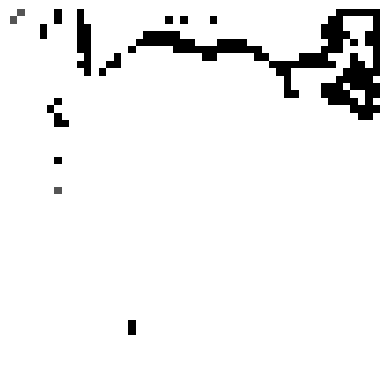

In [22]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import rasterio

# Function to load and display a TIFF file using Rasterio
def display_tif_with_rasterio(file_path):
    # Open the TIFF file
    with rasterio.open(file_path) as src:
        # Read the image
        tif_image = src.read()
        print(tif_image.shape)

        # Display the image
        # If the image has multiple bands, display the first band
        plt.imshow(tif_image[0], cmap='gray')
        plt.axis('off') # Hide the axis
        plt.show()

# Example usage (replace 'path_to_tif_file.tif' with the actual file path)
display_tif_with_rasterio('export/report.tif')

# Simulation Data

## Generate Synthetic Data

In [31]:
import numpy as np

# generate an array of dates, with each element being a week apart
dates = np.arange('2018-01-01', '2022-06-15', dtype='datetime64[W]')
dates = dates.astype('datetime64[W]')
dates

array(['2017-12-28', '2018-01-04', '2018-01-11', '2018-01-18',
       '2018-01-25', '2018-02-01', '2018-02-08', '2018-02-15',
       '2018-02-22', '2018-03-01', '2018-03-08', '2018-03-15',
       '2018-03-22', '2018-03-29', '2018-04-05', '2018-04-12',
       '2018-04-19', '2018-04-26', '2018-05-03', '2018-05-10',
       '2018-05-17', '2018-05-24', '2018-05-31', '2018-06-07',
       '2018-06-14', '2018-06-21', '2018-06-28', '2018-07-05',
       '2018-07-12', '2018-07-19', '2018-07-26', '2018-08-02',
       '2018-08-09', '2018-08-16', '2018-08-23', '2018-08-30',
       '2018-09-06', '2018-09-13', '2018-09-20', '2018-09-27',
       '2018-10-04', '2018-10-11', '2018-10-18', '2018-10-25',
       '2018-11-01', '2018-11-08', '2018-11-15', '2018-11-22',
       '2018-11-29', '2018-12-06', '2018-12-13', '2018-12-20',
       '2018-12-27', '2019-01-03', '2019-01-10', '2019-01-17',
       '2019-01-24', '2019-01-31', '2019-02-07', '2019-02-14',
       '2019-02-21', '2019-02-28', '2019-03-07', '2019-

In [33]:
# represents dates as the number of time units (in this case, weeks)
# if the epoch is January 1, 1970 (a common epoch in computing), and the timestamp value is 2500
timestamps = dates.astype(int)
timestamps

array([2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514,
       2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525,
       2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536,
       2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547,
       2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558,
       2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569,
       2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580,
       2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591,
       2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602,
       2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613,
       2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624,
       2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635,
       2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646,
       2647, 2648, 2649, 2650, 2651, 2652, 2653, 26

In [58]:
import random


random.seed(3)
break_idx = random.randint(30,100)
amplitude = 0.1
noise = 0.02

In [59]:
# create intercept of the time-series

# creates an array y that has the same shape as the array dates but with a different data type
y = np.empty_like(dates, dtype=np.float64)
intercept = 0.7
y[:] = intercept
y

array([0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.

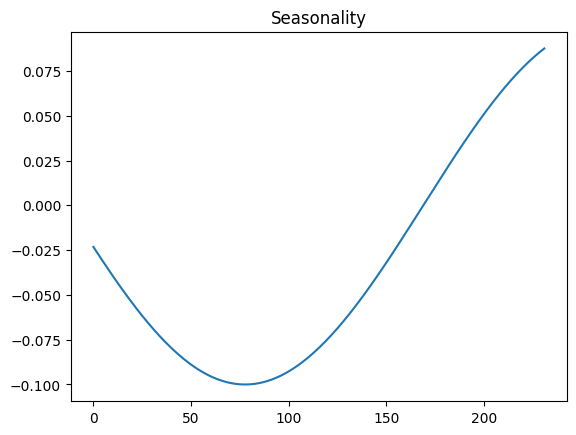

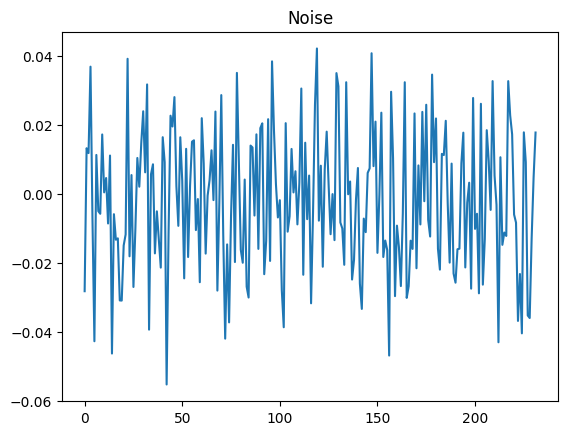

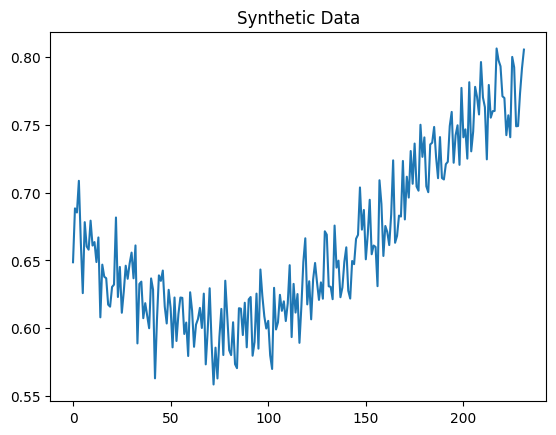

Outliers index: [154  96 200]
NaN index: [ 27  40 133]


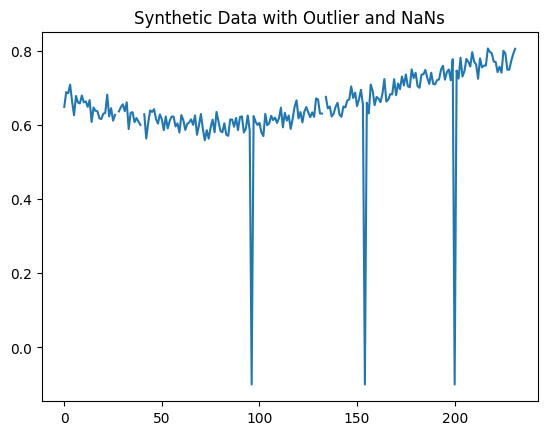

In [69]:
import matplotlib.pyplot as plt


# add seasonality variable
season = amplitude * np.sin(2 * np.pi * timestamps / 365.25 - 2)
plt.plot(season)
plt.title("Seasonality")
plt.show()

# add noise
sigma_noise=0.02
noise = np.random.normal(0, sigma_noise, dates.size)
plt.plot(noise)
plt.title("Noise")
plt.show()

# Combined trend, seasonality, and noise
ts = y + season + noise
plt.plot(ts)
plt.title("Synthetic Data")
plt.show()

# Adding outlier and NaN
n_outlier = 3 # Number of outliers randomly assigned to observations of the time-series
outlier_value = -0.1 # Value to assign to outliers
n_nan = 3 # Number of ``np.nan`` (no data) assigned to observations of the time-series
outliers_idx = np.random.choice(np.arange(0, dates.size), size=n_outlier, replace=False)
nan_idx = np.random.choice(np.arange(0, dates.size), size=n_nan)
print(f"Outliers index: {outliers_idx}\nNaN index: {nan_idx}")
ts[outliers_idx] = outlier_value
ts[nan_idx] = np.nan
plt.plot(ts)
plt.title("Synthetic Data with Outlier and NaNs")
plt.show()